In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [2]:
def get_graph(i, n, m):
    path = 'data/result_{i}_{n}_{m}.txt'.format(i=i, n=n, m=m)
    
    with open(path) as f:
        g = [list(map(int, line.split())) for line in f if len(line.split()) > 0]
    
    return g

### Задания

- Диаметр (V, если граф не является связным)
- Среднее растояние между вершинами в одной компоненте связности
- Построить гистограму #(n, d), оценить вероятность быть связным

### 1 и 2

In [3]:
INF = 10000

def calc_d(g):
    """
        Данная функция находит все попарные расстояния.
    """
    n = len(g)
    d = [[INF] * n] * n
    
    for i in range(n):
        for j in range(len(g[i])):
            d[i][g[i][j]] = 1
    
    for k in range(n):
        for i in range(n):
            for j in range(n):
                d[i][j] = min(d[i][j], d[i][k] + d[k][j]);
    
    return d


def calc_diam(d):
    n, diam = len(d), 0
    for i in range(n):
        for j in range(n):
            if d[i][j] == INF:
                return -1
            diam = max(diam, d[i][j])
    
    return diam

    
def calc_avgs(g, d):
    """
        Данная функция находит средние растояния между вершинами во всех компонентах связности.
    """
    def dfs(v, g, used, comp):
        n = len(g)
        S = [v,]

        used[v] = True
        comp.append(v)

        while len(S) != 0:
            t = S.pop()
            for to in g[t]:
                if not used[to]:
                    S.append(to)
                    used[to] = True
                    comp.append(to)
    
    res, n = [], len(g)
    used = [False] * n
    
    for i in range(n):
        if not used[i]:
            comp = []
            dfs(i, g, used, comp)

            res.append(0)
            t = len(comp)
            
            for x in range(t):
                for y in range(x + 1, t):
                    res[-1] += d[comp[x]][comp[y]]
            if t <= 1:
                print(comp,)
            if t > 1:
                res[-1] = res[-1] / (t * (t - 1) / 2)
    
    return res

def is_connected(g):
    """
        Данная функция проверят граф на связность.
    """
    def dfs(v, g, used):
        n, S = len(g), [v,]
        used[v] = True

        while len(S) != 0:
            t = S.pop()
            for to in g[t]:
                if not used[to]:
                    S.append(to)
                    used[to] = True
    
    n = len(g)
    used = [False] * n
    
    dfs(0, g, used)

    return all(used)

In [ ]:
for m in range(10, 16):
    g = get_graph(0, 500, m)
    d = calc_d(g)
    print(calc_diam(d), calc_avgs(g, calc_d(g)))

### 3

Посчитаем долю связных графов

In [5]:
tmp = [is_connected(get_graph(i, n, m)) for i in range(5) for n in range(500, 901, 10) for m in range(10, 31)]
print(len(list(filter(lambda x: x, tmp))) / len(tmp))

1.0


$$\#(n, d) \approx \frac{c}{d^{3}}$$

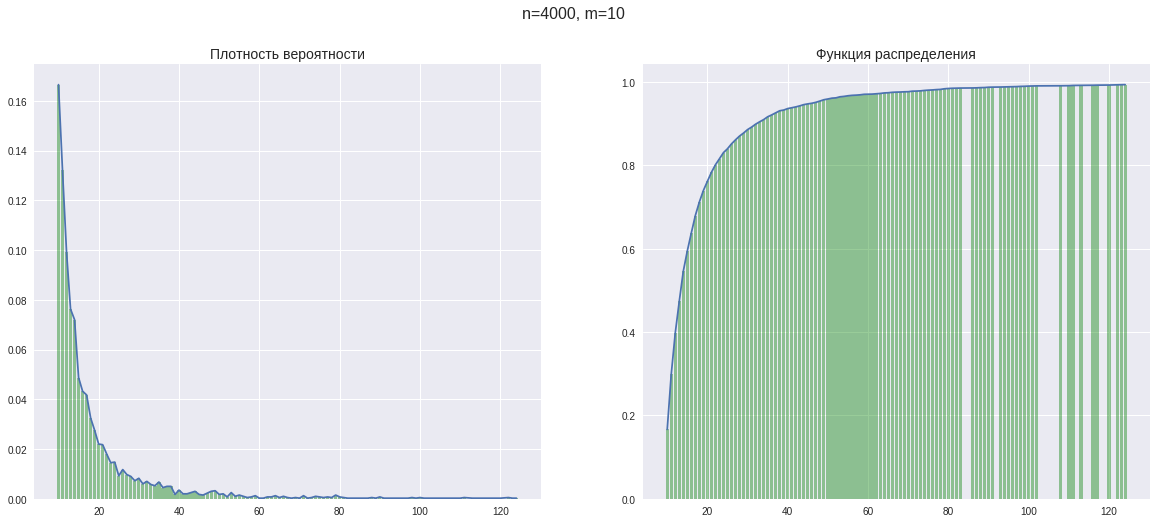

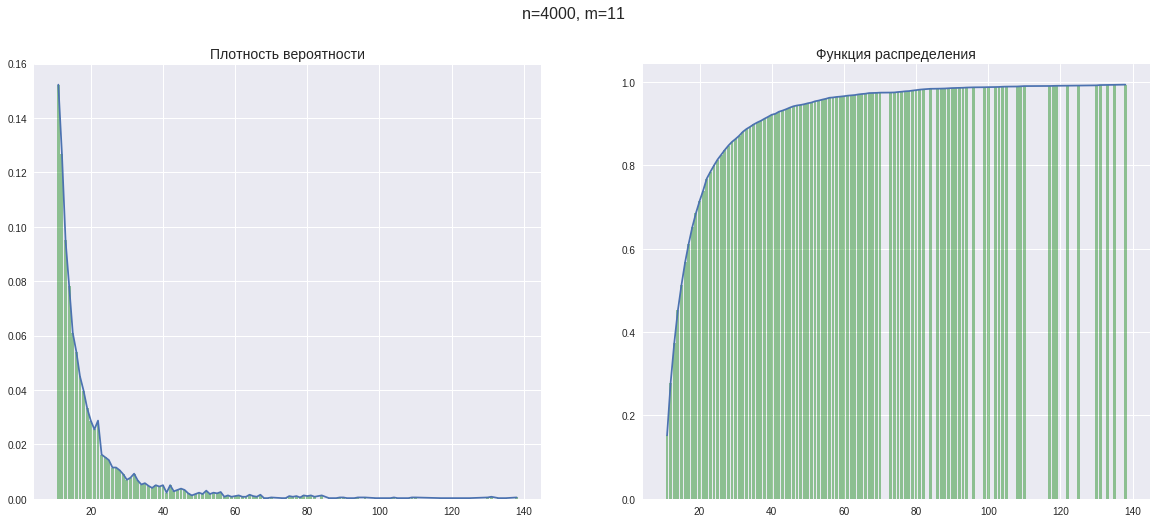

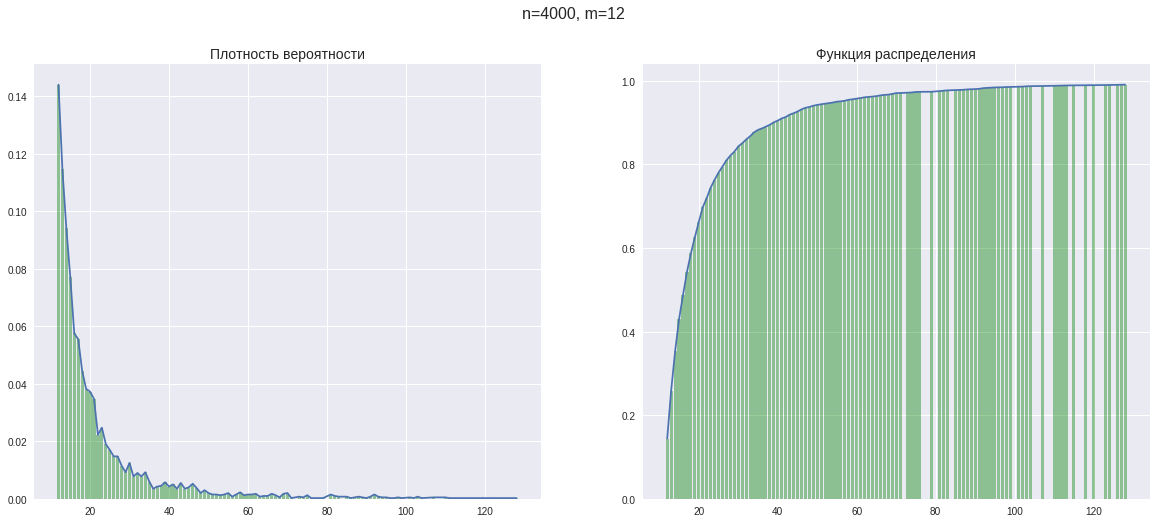

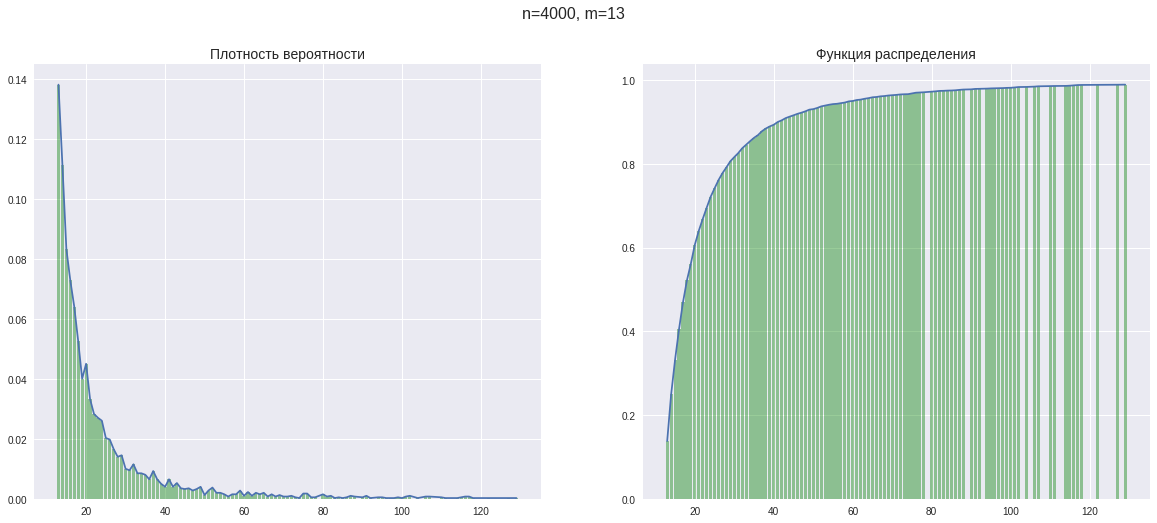

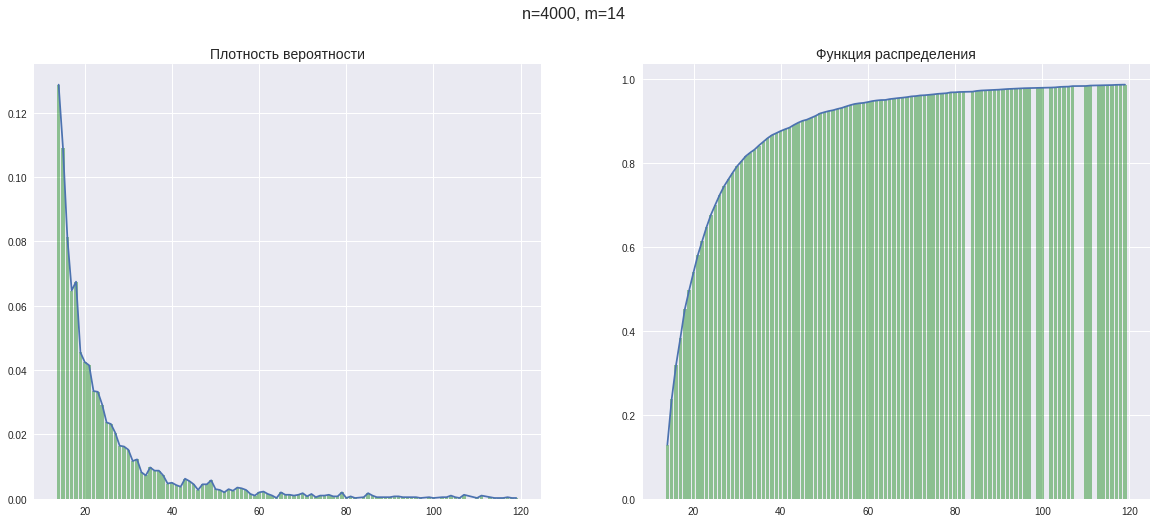

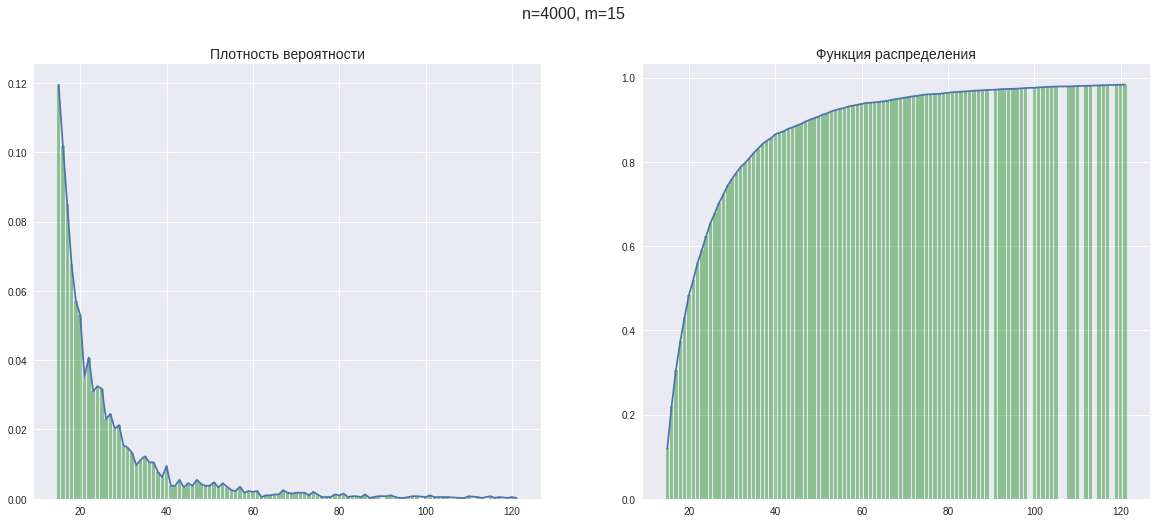

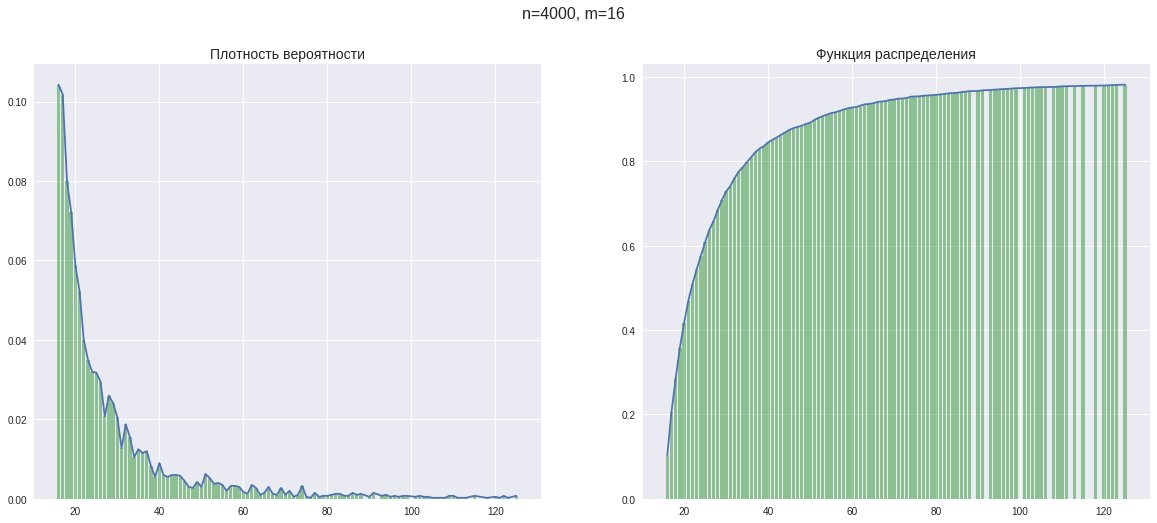

In [7]:
for n, m, g in [(4000, i, get_graph(2, 4000, i)) for i in range(10, 17)]:
    degs = list(map(len, g))
    unique_degs = {}

    for deg in degs:
        unique_degs[deg] = unique_degs.get(deg, 0) + 1

    xs, ys = map(np.array, zip(*sorted(list(unique_degs.items()), key=lambda x: x[0])))
    ys = ys / n
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle("n={n}, m={m}".format(n=n, m=m), fontsize=16)
    ax1.plot(xs[:100], ys[:100])
    ax1.bar(xs[:100], ys[:100], color='g', alpha=0.4)
    ax1.set_title("Плотность вероятности", fontsize=14)
    ax2.plot(xs[:100], np.cumsum(ys)[:100])
    ax2.bar(xs[:100], np.cumsum(ys)[:100], color='g', alpha=0.4)
    ax2.set_title("Функция распределения", fontsize=14)